<a href="https://colab.research.google.com/github/Kiruthika-KB/Final-Project/blob/main/Instagram_Influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1.	Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [28]:
import pandas as pd
dataset = pd.read_csv("Influencer.csv")

In [2]:
# Display column data types to understand the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [3]:
dataset.shape

(200, 10)

In [4]:
df=dataset

In [5]:
df.shape

(200, 10)

In [6]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [7]:
df=dataset.drop(['Rank','Channel Info','Influence Score','60-Day Eng Rate','Country Or Region'],axis=1)

In [8]:
df.columns

Index(['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes',
       'Total Likes'],
      dtype='object')

In [10]:
dataset.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [13]:
def convert_to_float(value):
    try:
        # Check if the value is a string before looking for 'k' or 'm'
        if isinstance(value, str):
            if 'k' in value:
                return float(value.replace('k', '')) * 1_000
            elif 'm' in value:
                return float(value.replace('m', '')) * 1_000_000
        # If not a string or doesn't contain 'k' or 'm', try converting to float directly
        return float(value)
    except ValueError:
        return None  # Handle invalid cases gracefully

# Iterate through the columns and convert
for col in df.columns:
    df[col] = df[col].apply(convert_to_float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Followers            200 non-null    float64
 1   Avg. Likes           200 non-null    float64
 2   Posts                200 non-null    float64
 3   New Post Avg. Likes  200 non-null    float64
 4   Total Likes          48 non-null     float64
dtypes: float64(5)
memory usage: 7.9 KB


In [15]:
# Select only numeric columns for correlation analysis
df['Rank']=dataset['Rank']
df['Influence Score']=dataset['Influence Score']
df['60-Day Eng Rate']=dataset['60-Day Eng Rate']

In [16]:
df.columns

Index(['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes',
       'Total Likes', 'Rank', 'Influence Score', '60-Day Eng Rate'],
      dtype='object')

In [24]:
column=['Followers','Avg. Likes','Posts','New Post Avg. Likes','Total Likes','Rank','Influence Score','60-Day Eng Rate']
numeric_data=df[column]

In [25]:
# Compute the correlation matrix
correlation_matrix =numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                      Followers  Avg. Likes     Posts  New Post Avg. Likes  \
Followers             1.000000    0.346829  0.069171             0.260764   
Avg. Likes            0.346829    1.000000 -0.348795             0.892784   
Posts                 0.069171   -0.348795  1.000000            -0.285154   
New Post Avg. Likes   0.260764    0.892784 -0.285154             1.000000   
Total Likes          -0.202780   -0.063060  0.326416            -0.090676   
Rank                 -0.698193   -0.277699 -0.058132            -0.272323   
Influence Score       0.365428    0.048502  0.168287             0.040011   
60-Day Eng Rate      -0.107439    0.789359 -0.334047             0.866293   

                     Total Likes      Rank  Influence Score  60-Day Eng Rate  
Followers              -0.202780 -0.698193         0.365428        -0.107439  
Avg. Likes             -0.063060 -0.277699         0.048502         0.789359  
Posts                   0.326416 -0.058132      

In [26]:
import numpy as np
# Find the most highly correlated features (excluding self-correlation)
correlation_matrix_abs = correlation_matrix.abs()
np.fill_diagonal(correlation_matrix_abs.values, 0)  # Ignore self-correlation
highly_correlated_pair = correlation_matrix_abs.stack().idxmax()
highest_correlation_value = correlation_matrix_abs.stack().max()

print(f"Most correlated features: {highly_correlated_pair}")
print(f"Correlation coefficient: {highest_correlation_value}")

Most correlated features: ('Avg. Likes', 'New Post Avg. Likes')
Correlation coefficient: 0.8927840403263658


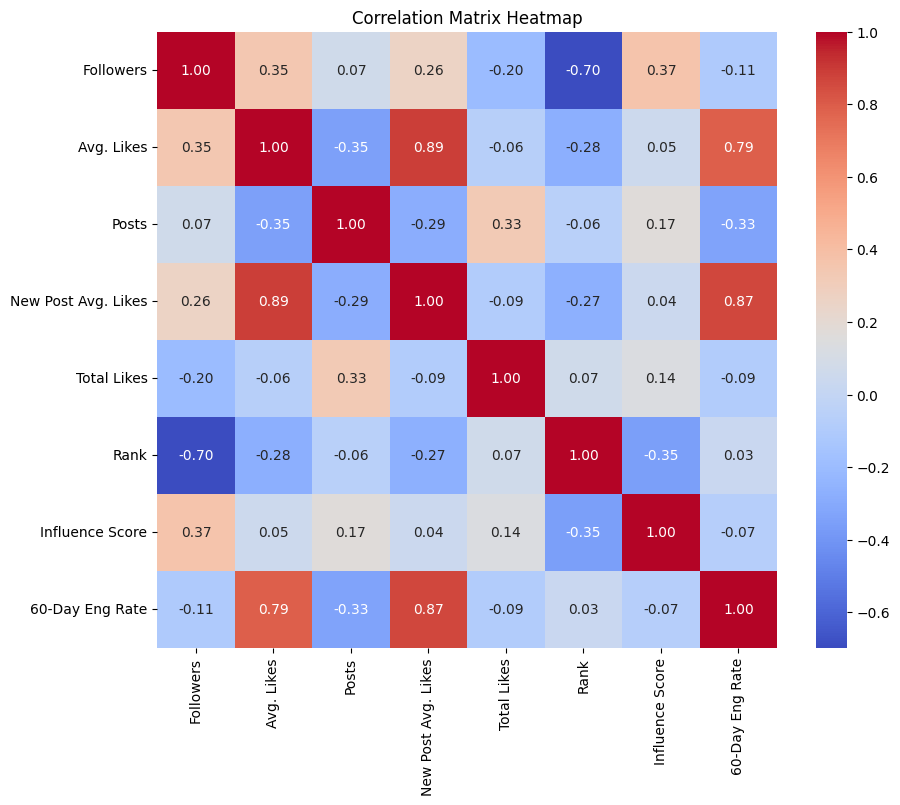

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()
